# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. The original dataset is prepared by [Prajna Bhandary](https://www.linkedin.com/in/prajna-bhandary-0b03a416a/) and available at [Github](https://github.com/prajnasb/observations/tree/master/experiements/data)

# Data Preprocessing

In [1]:
import cv2, os

data_path = 'C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/data/train'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

# empty dictionary
label_dict = dict(zip(categories, labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [4]:
np.save('C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/data',data)
np.save('C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/target',new_target)

# CNN Architecture

In [5]:
import numpy as np

data=np.load('C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/data.npy')
target=np.load('C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/target.npy')

#loading the saved numpy arrays

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
30/30 [==============================] - 47s 1s/step - loss: 0.7789 - accuracy: 0.4971 - val_loss: 0.6843 - val_accuracy: 0.5021
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
30/30 [==============================] - 35s 1s/step - loss: 0.6718 - accuracy: 0.5498 - val_loss: 0.6335 - val_accuracy: 0.6160
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
30/30 [==============================] - 35s 1s/step - loss: 0.5338 - accuracy: 0.7338 - val_loss: 0.5040 - val_accuracy: 0.7511
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
30/30 [==============================] - 42s 1s/step - loss: 0.3550 - accuracy: 0.8567 - val_loss: 0.4007 - val_accuracy: 0.8186
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
30/30 [==============================] - 55s 2s/step - loss: 0.2656 - accuracy: 0.8944 - val_loss: 0.3086 - val_accuracy: 0.8776
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20

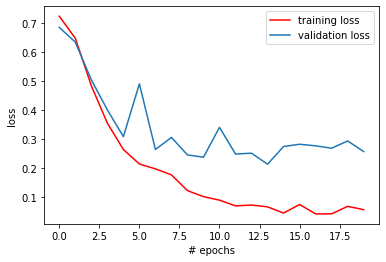

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

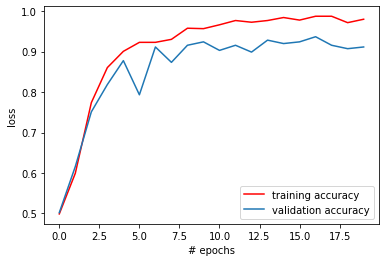

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 307ms/step - loss: 0.2731 - accuracy: 0.9470
[0.273066908121109, 0.9469696879386902]


# Detecting faces with and without masks

In [12]:
from keras.models import load_model
import cv2
import numpy as np

In [13]:
model = load_model('model-007.model')

face_clsfr=cv2.CascadeClassifier('C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/haarcascade_frontalface_default.xml')

#source=cv2.VideoCapture(0)

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [14]:
while (True):
    #ret, img = source.read()
    #img  = cv2.imread('C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/10.jpg', cv2.IMREAD_COLOR)
    img  = cv2.imread('C:/Users/NJ185051/Downloads/LetsUpgrade/AIML/Project 10/11-with-mask.jpg', cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_clsfr.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face_img = gray[y:y + w, x:x + w]
        resized = cv2.resize(face_img, (100, 100))
        normalized = resized / 255.0
        reshaped = np.reshape(normalized, (1, 100, 100, 1))
        result = model.predict(reshaped)

        label = np.argmax(result, axis=1)[0]

        cv2.rectangle(img, (x, y), (x + w, y + h), color_dict[label], 2)
        cv2.rectangle(img, (x, y - 40), (x + w, y), color_dict[label], -1)
        cv2.putText(img, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow('LIVE', img)
    key = cv2.waitKey(1)

    if (key == 27):
        break

cv2.destroyAllWindows()
#source.release()